<a href="https://colab.research.google.com/github/marcaualex/DSIP/blob/main/%20Handle%20missing%20values%20%3B%20check%20outliers%20and%20apply%20transformations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style

In [10]:
train = pd.read_csv("train.csv")
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [9]:
test = pd.read_csv("test.csv")
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


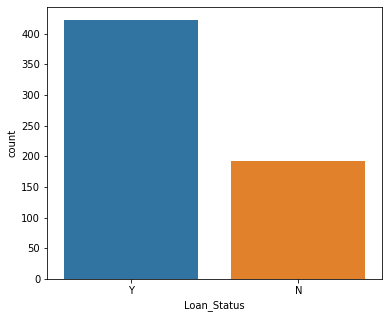

In [11]:
plt.figure(figsize=(6,5))
sns.countplot(train["Loan_Status"])

In [12]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

Text(0, 0.5, 'Percentage')

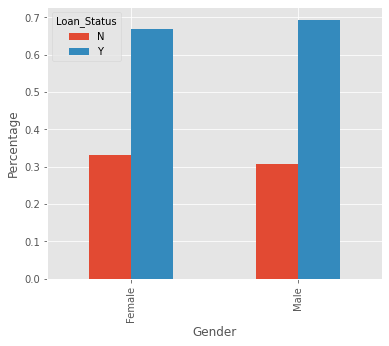

In [13]:
crosstab = pd.crosstab(train["Gender"],train["Loan_Status"])

style.use("ggplot")

crosstab.div(crosstab.sum(1).astype(float),axis=0).plot(kind="bar",figsize=(6,5))
plt.ylabel("Percentage")

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


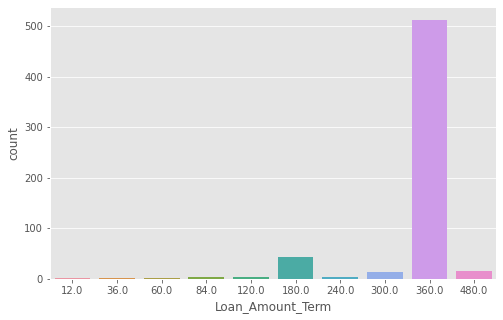

In [14]:
plt.figure(figsize=(8,5))
sns.countplot(train["Loan_Amount_Term"])

Text(0, 0.5, 'Percentage')

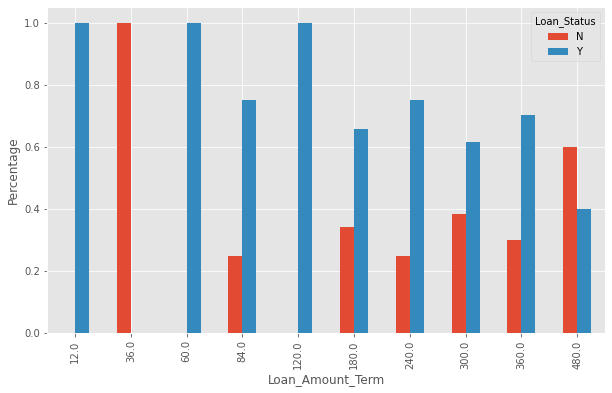

In [15]:
crosstab = pd.crosstab(train["Loan_Amount_Term"],train["Loan_Status"])
style.use("ggplot")
crosstab.div(crosstab.sum(1).astype(float),axis=(0)).plot(kind="bar",figsize=(10,6))
plt.ylabel("Percentage")

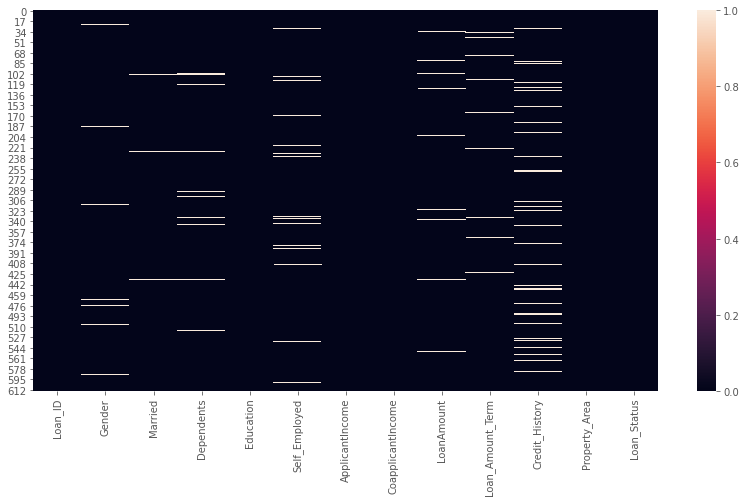

In [16]:
plt.figure(figsize=(14,7))
sns.heatmap(train.isnull())

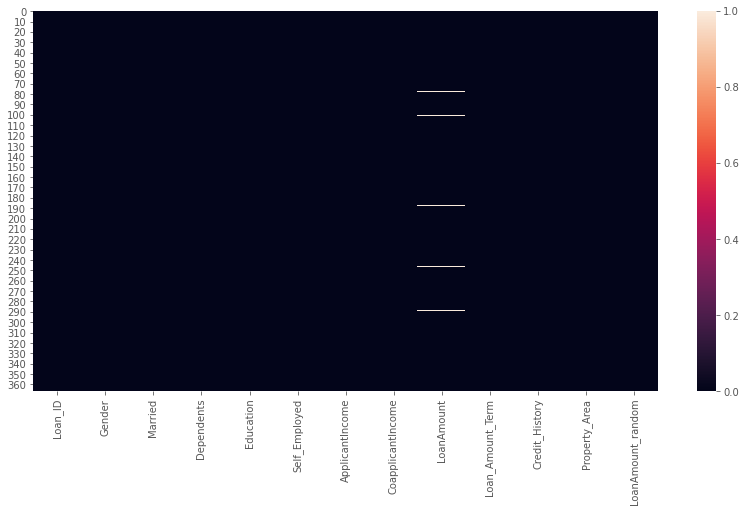

In [33]:
plt.figure(figsize=(14,7))
sns.heatmap(test.isnull())

In [17]:
train["Gender"] = train["Gender"].fillna("Male")
test["Gender"] = test["Gender"].fillna("Male")
train["Married"] = train["Married"].fillna("Yes")
test["Married"] = test["Married"].fillna("Yes")
train["Dependents"] = train["Dependents"].fillna(0)
test["Dependents"] = test["Dependents"].fillna(0)
train["Self_Employed"] = train["Self_Employed"].fillna("No")
test["Self_Employed"] = test["Self_Employed"].fillna("No")
train["Loan_Amount_Term"] = train["Loan_Amount_Term"].fillna(360.0)
test["Loan_Amount_Term"] = test["Loan_Amount_Term"].fillna(360.0)
train["Credit_History"] = train["Credit_History"].fillna(1.0)
test["Credit_History"] = test["Credit_History"].fillna(1.0)

In [45]:
random_sample = train["LoanAmount"].dropna().sample(train["LoanAmount"].isnull().sum(),random_state=0)
random_sample.index = train[train["LoanAmount"].isnull()].index
train["LoanAmount_random"] = train["LoanAmount"].fillna(random_sample)

In [44]:
random_sample = test["LoanAmount"].dropna().sample(test["LoanAmount"].isnull().sum(),random_state=0)
random_sample.index = test[test["LoanAmount"].isnull()].index
test["LoanAmount_random"] = test["LoanAmount"].fillna(random_sample)

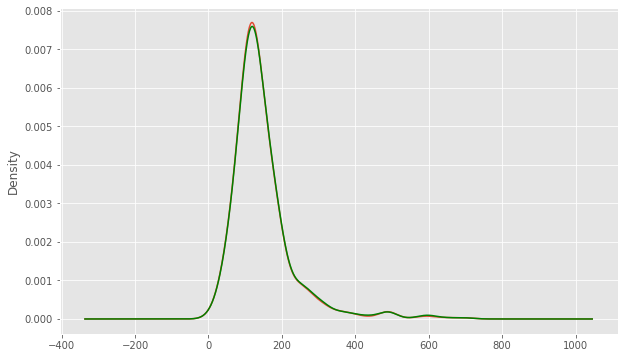

In [46]:
plt.figure(figsize=(10,6))
train["LoanAmount"].plot(kind="kde")
train["LoanAmount_random"].plot(kind="kde",c="green")

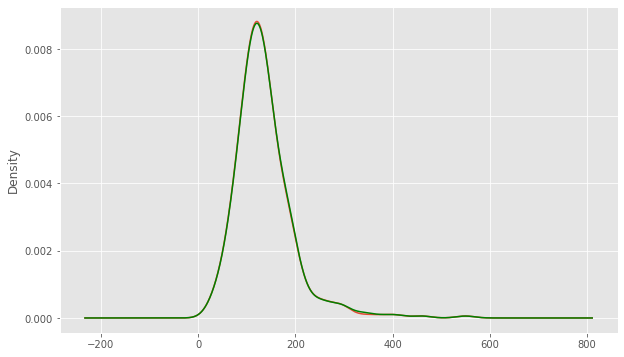

In [47]:
plt.figure(figsize=(10,6))
test["LoanAmount"].plot(kind="kde")
test["LoanAmount_random"].plot(kind="kde",c="green")

In [49]:
train = train.drop("LoanAmount",axis=1)
test = test.drop("LoanAmount",axis=1)

In [50]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_random    0
dtype: int64

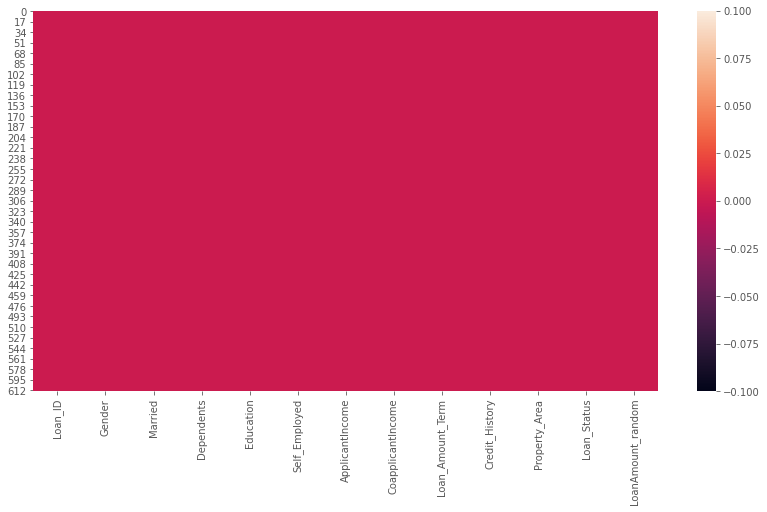

In [51]:
plt.figure(figsize=(14,7))
sns.heatmap(train.isnull())

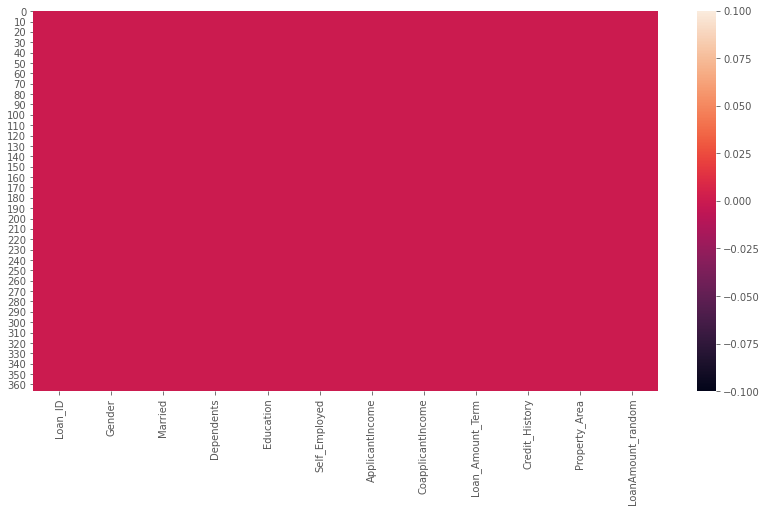

In [52]:
plt.figure(figsize=(14,7))
sns.heatmap(test.isnull())

In [60]:
import scipy.stats as st
import pylab

In [61]:
def qq_plot(data_frame, feature_name):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    st.probplot(data_frame[feature_name],dist="norm", plot=pylab)
    plt.subplot(1,2,2)
    data_frame[feature_name].hist()
    plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


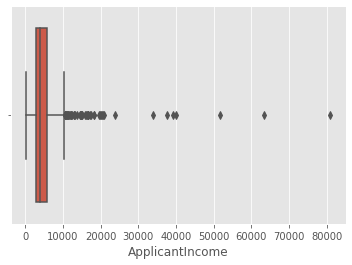

In [62]:
sns.boxplot(train.ApplicantIncome)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


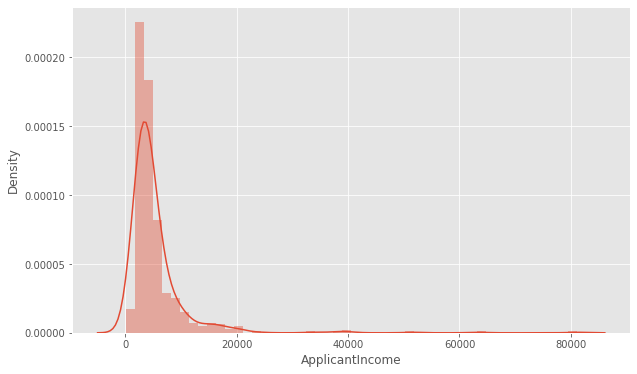

In [63]:
plt.figure(figsize=(10,6))

sns.distplot(train["ApplicantIncome"])

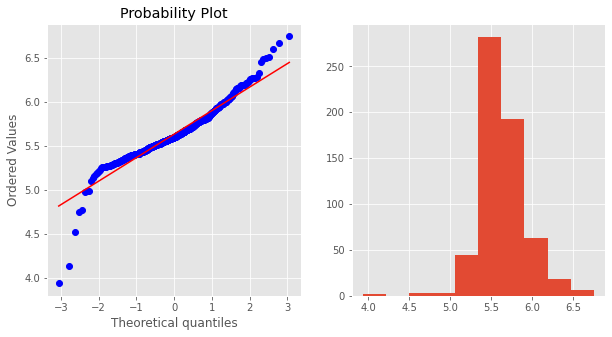

In [71]:
qq_plot(train,"ApplicantIncome")

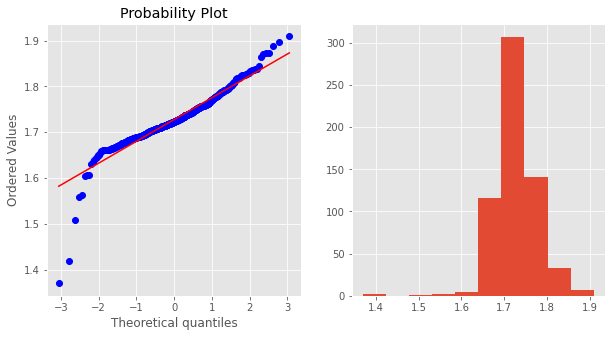

In [72]:
train_copy = train.copy()

train_copy["ApplicantIncome"] = np.log(train_copy["ApplicantIncome"])
qq_plot(train_copy,"ApplicantIncome")

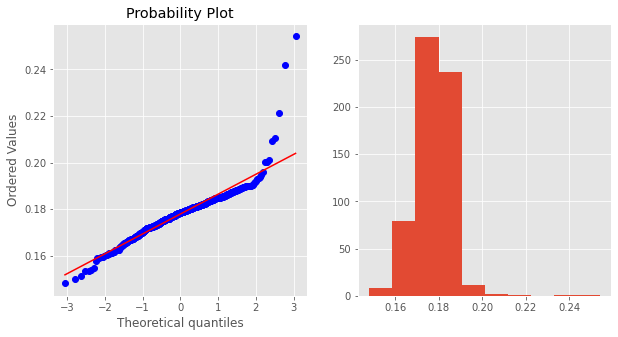

In [73]:
train_copy = train.copy()

train_copy["ApplicantIncome"] = 1/(train_copy["ApplicantIncome"])
qq_plot(train_copy,"ApplicantIncome")

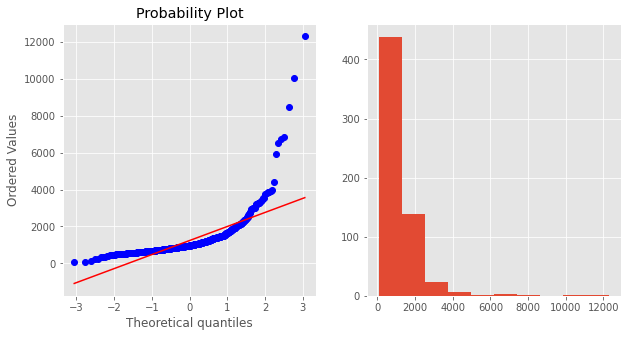

In [67]:
train_copy = train.copy()

train_copy["ApplicantIncome"] = train_copy["ApplicantIncome"]**(1/1.2)
qq_plot(train_copy,"ApplicantIncome")

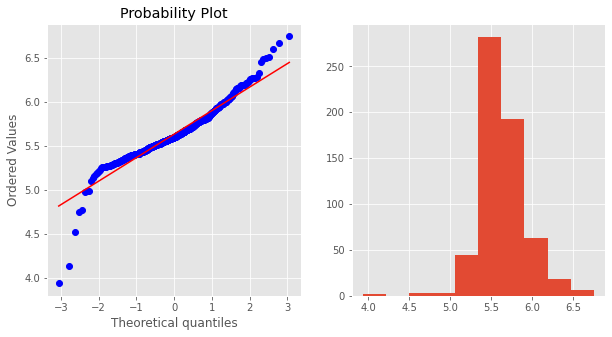

In [68]:
train_copy = train.copy()

train_copy["ApplicantIncome"], parameter = st.boxcox(train_copy["ApplicantIncome"])

qq_plot(train_copy,"ApplicantIncome")

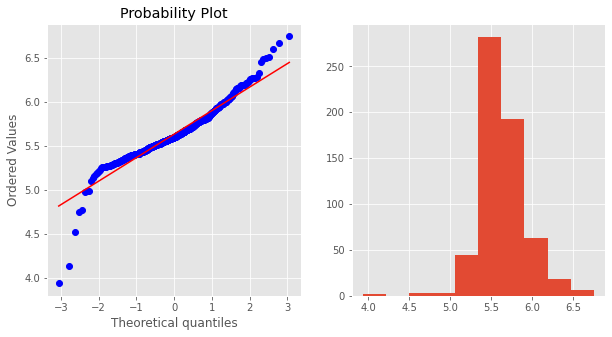

In [69]:
train["ApplicantIncome"], parameter = st.boxcox(train["ApplicantIncome"])

qq_plot(train,"ApplicantIncome")

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


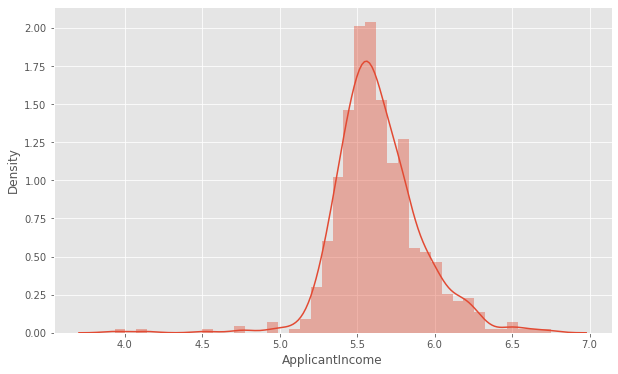

In [75]:
plt.figure(figsize=(10,6))

sns.distplot(train["ApplicantIncome"])